In [1]:
#This code for counting all train locations from all dataframes
#Histogram plot
#convert all counts (msecs) to hh:mm:ss
prgname = 'rlf_cntlocs_histo_pie_mul_dfrmes.ipynb'

In [2]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt

from rlf_plot_functions import *

In [3]:
#reading the dataframe (csv) files 
path = "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/RLF_relateddata/cell_orig_data/"
# path = "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/RLF_relateddata/cell_data_new/"
all_files = glob.glob(os.path.join(path, "cell-*.csv"))
print(len(all_files))

116


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/ipykernel_launcher.py:27:

locs_cnt
 ENTER_STATION  1131640.0
 ENTER_TRAIN     284621.0
 EXIT_STATION   1070502.0
 EXIT_TRAIN      935064.0
 TRAIN_START    2930807.0
 TRAIN_STOP     1236476.0
 unknown          17453.0
Stop                108.0

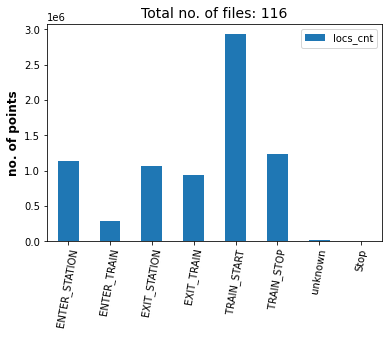

In [4]:
#here read dataframe, allocate column names and counting each dataframe 
prgname = 'rlf_cntlocs_histo_mul_dfrmes.ipynb'
count_mulcsv = []
for fle in all_files:
    df = pd.read_csv(fle, skiprows=1,low_memory=True, header=None)
    numcols = len(df.columns)
    #print('Number of columns: ',numcols)
    
    if(numcols == 9):
        df.rename(columns={0:"Train_loc", 1:"Poll", 2:"numb", 3:"NotR", 4:"RSSI", 5:"RSRP", 6:"RSRQ", 7:"TF", 8:"cellIDnum"}, inplace = True)
    if(numcols == 10):
        df.rename(columns={0:"Train_loc", 1:"Unk", 2:"Poll", 3:"numb", 4:"NotR", 5:"RSSI", 6:"RSRP", 7:"RSRQ", 8:"TF", 9:"cellIDnum"}, inplace = True)
    if(numcols == 13):
        df.rename(columns={0:"Train_loc", 1:"Unk", 2:"Poll", 3:"numb", 4:"NotR", 5: "dummy1", 6: "LTENR", 
                           7:"dummy2", 8:"TF", 9:"RSRP", 10:"RSRQ", 11:"dummy3", 12:"RSSI"}, inplace = True)
        #drop some columns from dataframe
        df = df[df['LTENR'] == "NR"]
    
    #counting train_locs for each data frame
    count_loc = df['Train_loc'].value_counts()
    #appending counting frames
    count_mulcsv.append(count_loc)

#just display for reference purpose
# display(count_mulcsv)
#here total count of all data frames
cnt_allcsv_locs = pd.Series()
for lst in count_mulcsv:
    cnt_allcsv_locs = cnt_allcsv_locs.add(lst, fill_value=0)
    
# display(cnt_allcsv_locs)
#forming a total all csv files count dataframe with coulmn name
df1 = pd.DataFrame(cnt_allcsv_locs, columns = ['locs_cnt'])
#removing the LT 3 points from data frame
df2 = df1[df1['locs_cnt'] > 30]
display(df2)

#Histogram plot
ax = df2.plot.bar(rot=80,figsize=(6, 4))
plt.ylabel('no. of points', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
nums = 'Total no. of files: ' + np.str(len(all_files))
plt.title(nums, fontsize=14)

plt.savefig('/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/RLF_relateddata/plots/barplot_116fls.pdf', bbox_inches = "tight") 


In [5]:
#here is calc the time period using dataframes (I assumed each obs is 25 msec)
df2.loc[:,'locs_cnt'] *= (20.)
# df2.time = pd.to_timedelta(df2.locs_cnt, unit='ms')
# df2.time
tme = (pd.to_timedelta(df2.locs_cnt, unit='ms'))
display(tme)

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


 ENTER_STATION   0 days 06:17:12.800000
 ENTER_TRAIN     0 days 01:34:52.420000
 EXIT_STATION    0 days 05:56:50.040000
 EXIT_TRAIN      0 days 05:11:41.280000
 TRAIN_START     0 days 16:16:56.140000
 TRAIN_STOP      0 days 06:52:09.520000
 unknown         0 days 00:05:49.060000
Stop             0 days 00:00:02.160000
Name: locs_cnt, dtype: timedelta64[ns]

In [6]:
#Time period adding into datatframe
dff = pd.DataFrame(dict(locs_cnt = df2.locs_cnt, timestamp = tme))
display(dff)
#just this trying to save dataframe but some issues in the export command
df_style = dff.style.background_gradient()
display(df_style)

# import dataframe_image as dfi
# dfi.export(df_style, 'df_style.png')

locs_cnt              timestamp
 ENTER_STATION  22632800.0 0 days 06:17:12.800000
 ENTER_TRAIN     5692420.0 0 days 01:34:52.420000
 EXIT_STATION   21410040.0 0 days 05:56:50.040000
 EXIT_TRAIN     18701280.0 0 days 05:11:41.280000
 TRAIN_START    58616140.0 0 days 16:16:56.140000
 TRAIN_STOP     24729520.0 0 days 06:52:09.520000
 unknown          349060.0 0 days 00:05:49.060000
Stop                2160.0 0 days 00:00:02.160000

In [7]:
#here allocating the first column name
dff.reset_index(inplace=True)
dff = dff.rename(columns = {'index':'train_locs'})
dff

train_locs    locs_cnt              timestamp
0   ENTER_STATION  22632800.0 0 days 06:17:12.800000
1     ENTER_TRAIN   5692420.0 0 days 01:34:52.420000
2    EXIT_STATION  21410040.0 0 days 05:56:50.040000
3      EXIT_TRAIN  18701280.0 0 days 05:11:41.280000
4     TRAIN_START  58616140.0 0 days 16:16:56.140000
5      TRAIN_STOP  24729520.0 0 days 06:52:09.520000
6         unknown    349060.0 0 days 00:05:49.060000
7            Stop      2160.0 0 days 00:00:02.160000

In [8]:
#here I am showing the data metric on pie diagram
import plotly.express as px
tit1 = 'Subway files: 116 files'
dff['locs_cnt'] = dff['locs_cnt'] / 45.
fig = px.pie(dff, values='locs_cnt', names='train_locs',title=tit1)
fig.add_annotation(text = prgname, xref="paper", yref="paper",
                  x=0.98, y=-0.15, showarrow=False, font=dict(color="#777777"),opacity=0.55)
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [9]:
fig.write_html("/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/RLF_relateddata/plots/pie_116fls.html",
              full_html=False, include_plotlyjs='cdn')